In [ ]:
%%capture

%cd ..


In [ ]:
import torch

torch.device("cuda" if torch.cuda.is_available() else "cpu")


device(type='cuda')

In [ ]:
from pathlib import Path

DATA_DIR = Path("Z:/home/marco/data")
DATA_DIR, DATA_DIR.is_dir()


(WindowsPath('Z:/home/marco/data'), True)

In [ ]:
import json
from pprint import pprint

with open("configs/config_train.json") as fd:
    config = json.load(fd)

# pprint(config)


In [ ]:
from config import LOGS_DIR
import datetime

now = datetime.datetime.now()
day, month, year = now.day, now.month, now.year
logs_dir = Path(config["GENERAL"].get("logs_dir", LOGS_DIR)) / "_".join(
    list(map(str, [day, month, year])) + [str(t).zfill(2) for t in [day, month, year]]
)
logs_dir;


In [ ]:
from data.AxialDataset import AxialPatchDataset, AxialSliceDataset

train = [
    AxialPatchDataset(config["DATA"], opt="low"),
    AxialPatchDataset(config["DATA"]),
    AxialPatchDataset(config["DATA"], opt="high"),
]

val = [
    AxialSliceDataset(config["DATA"], mode="val", opt="low"),
    AxialSliceDataset(config["DATA"], mode="val"),
    AxialSliceDataset(config["DATA"], mode="val", opt="high"),
]


In [ ]:
from torch.utils.data import DataLoader

bs = config["OPTIMIZER"]["batch_size"]
print(bs)

train_low = DataLoader(train[0], batch_size=bs // 2, shuffle=True, num_workers=0)
train_opt = DataLoader(train[1], batch_size=bs, shuffle=True, num_workers=0)
train_high = DataLoader(train[2], batch_size=bs // 2, shuffle=True, num_workers=0)


64


In [ ]:
iter_low = iter(train_low)
iter_opt = iter(train_opt)
iter_high = iter(train_high)


In [ ]:
train_opt_dataset = train[1]
train_high_dataset = train[2]
# print(train_opt_dataset.id_list[0])
# train_opt_dataset[0]


In [ ]:
train_opt_dataset.ps, train_opt_dataset.random_shift


(128, 32)

In [ ]:
from data.H5Dataset import H5Dataset

scan = H5Dataset(train_opt_dataset.id_list[0], n_slices=config["DATA"]["n_slices"])
scan.image.shape, scan.pad_z


((512, 512, 311), 0)

In [ ]:
patch, mask = scan.get_axial_patch(train_opt_dataset.ps)
patch.shape, patch.dtype, mask.shape


((128, 128, 1), dtype('int16'), (128, 128, 1))

[[383, 511], [59, 187], [129, 130]]
(512, 512, 311)
<Attributes of HDF5 object at 1540792795280>


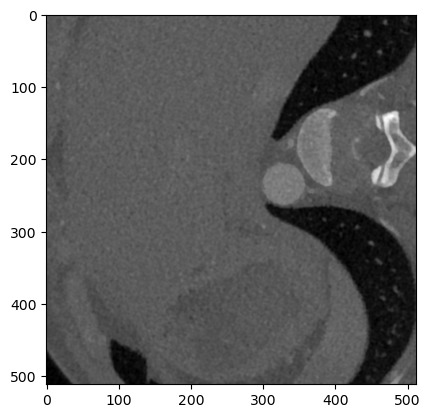

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import h5py

bbox = [[383, 511], [59, 187], [129, 130]]
print(bbox)

with h5py.File(train_opt_dataset.id_list[0]) as file:
    img = file["ccta"]["ccta"]
    print(img.shape)
    print(img.attrs)
    plt.imshow(img[:, :, 0], cmap="grey")
    slice_ = img[
        bbox[0][0] : bbox[0][1], bbox[1][0] : bbox[1][1], bbox[2][0] : bbox[2][1]
    ]
    mask_ = np.full(slice_.shape, False)


(512, 512, 347)
<KeysViewHDF5 ['ctl_points', 'offset', 'spacing']>


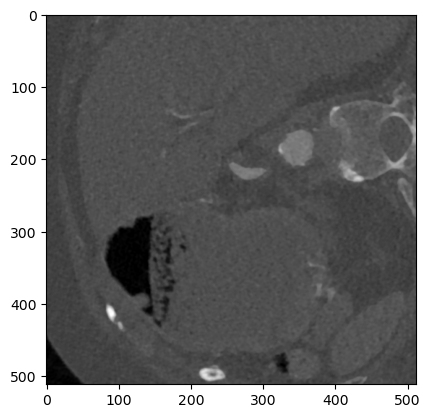

In [ ]:
with h5py.File(train_high_dataset.id_list[0]) as file:
    img = file["ccta"]["ccta"]
    print(img.shape)
    print(img.attrs.keys())
    plt.imshow(img[:, :, 0], cmap="grey")
    slice_ = img[
        bbox[0][0] : bbox[0][1], bbox[1][0] : bbox[1][1], bbox[2][0] : bbox[2][1]
    ]
    mask_ = np.full(slice_.shape, False)


<matplotlib.image.AxesImage>

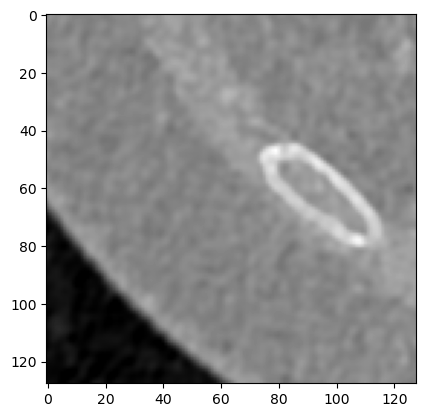

In [ ]:
plt.imshow(slice_, cmap="grey")


(512, 512, 311)
<Attributes of HDF5 object at 1540807985248>


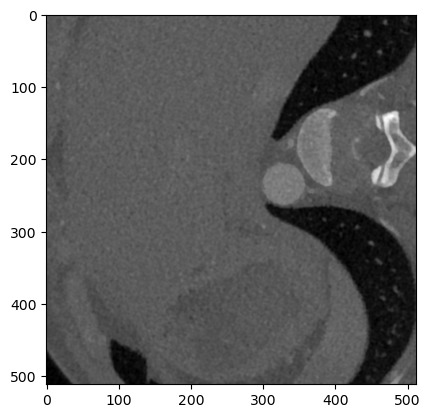

In [ ]:
hp5_scan = h5py.File(train_opt_dataset.id_list[0])
img = hp5_scan["ccta"]["ccta"]
print(img.shape)
print(img.attrs)
plt.imshow(img[:, :, 0], cmap="grey")
slice_ = img[
    bbox[0][0] : bbox[0][1], bbox[1][0] : bbox[1][1], bbox[2][0] : bbox[2][1]
]
mask_ = np.full(slice_.shape, False)


<matplotlib.image.AxesImage>

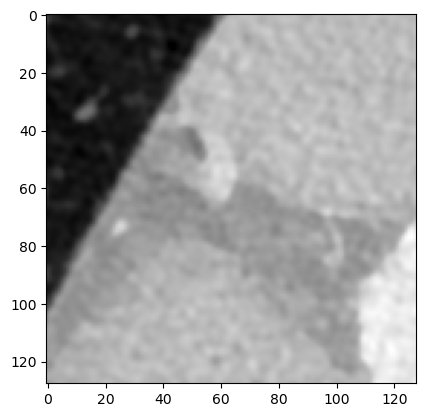

In [ ]:
plt.imshow(patch, cmap="gray")


<matplotlib.image.AxesImage>

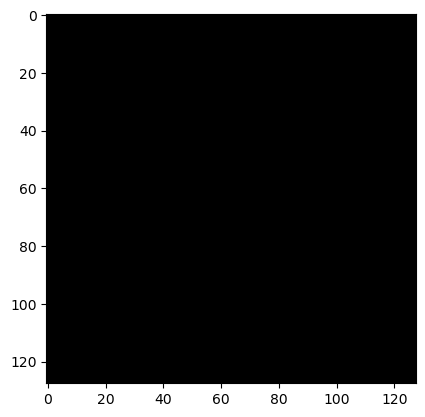

In [ ]:
plt.imshow(patch * mask, cmap="gray")


<matplotlib.image.AxesImage>

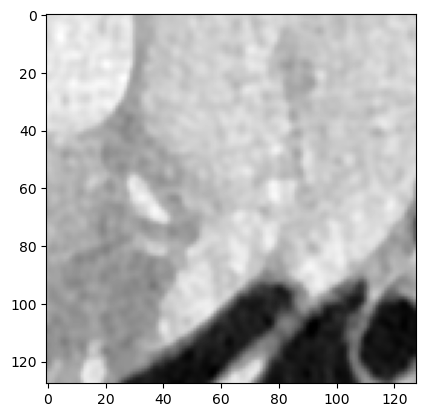

In [ ]:
scan = H5Dataset(train_opt_dataset.id_list[0], n_slices=config["DATA"]["n_slices"])
patch, mask = scan.get_axial_centerline_patch(train_opt_dataset.ps, train_opt_dataset.random_shift)
plt.imshow(patch, cmap="gray")


<matplotlib.image.AxesImage>

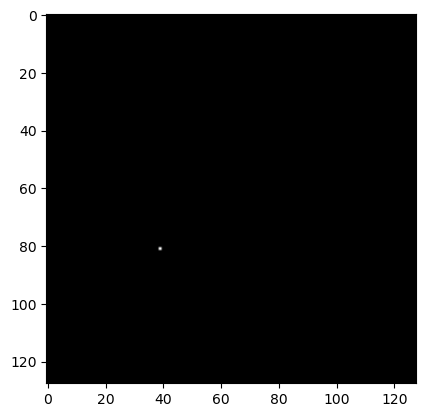

In [ ]:
plt.imshow(patch * mask, cmap="gray")


In [ ]:
opt_patch = next(iter_opt)
opt_patch[0].shape, opt_patch[1].shape


(torch.Size([64, 1, 128, 128]), torch.Size([64, 1, 128, 128]))